In [1]:
import pandas as pd
from nltk.corpus import stopwords 
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer   
from nltk import word_tokenize
from spellchecker import SpellChecker
from textblob import TextBlob
import matplotlib.pyplot as plt

# Preprocessing


In [ ]:
def stopword():
     stop=stopwords.words("english")
     twitter["text"]=twitter["text"].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
     return twitter["text"]

In [5]:
z= stopword() 

In [6]:
def r_exp(z):
    twitter['text']=twitter['text'].apply(lambda x:re.sub(r"http\S+",'', x))
    twitter['text']=twitter['text'].apply(lambda x:re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",'',x))
    twitter['text']=twitter['text'].apply(lambda x:re.sub('@[^\s]+','',x))
    twitter['text']=twitter['text'].apply(lambda x:re.sub('#[^\s]+','',x))
    twitter['text']=twitter['text'].apply(lambda x:re.sub('<[^\s]+','',x))
    twitter['text']=twitter['text'].apply(lambda x:re.sub('\$\w*','',x))
    return twitter['text']

In [7]:
y=r_exp(z)

In [8]:
punct_num = '''!()-àÂ[]{};:\n,<>./?@#%^"&\*_~0123456789=\x92\x92\x96\x85+|'"''' #for punctuation
def punctuation(x):
    no_punct = ""
    for char in x:
            if char not in punct_num :
                no_punct = no_punct + char  
    return(no_punct)
twitter['text']=twitter['text'].apply(lambda x:punctuation(x))

#  stemmer and lemmatizer

In [9]:
def s_and_l(x):
    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()

    l = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(x)])
    z = ' '.join([stemmer.stem(w) for w in word_tokenize(l)])
    return z

twitter['text']=twitter['text'].apply(lambda x:s_and_l(x))

# spellchecker

In [10]:
from spellchecker import SpellChecker
spell = SpellChecker()
def spellcheck(x):
        correct={}
        wrong=spell.unknown(x.split())
        for t in wrong:
            correct[t]=spell.correction(t)
        for t in correct.keys():
            x= re.sub(t,correct[t],x,flags=re.IGNORECASE)
        return(x)
twitter['text']=twitter['text'].apply(lambda x:spellcheck(x))
df=pd.DataFrame(twitter['text'])
df.columns=["text"]

# alphanumeric character

In [11]:
def alnum():
    for i in range(1000):
        if (i.isalnum() for i in df['text'])==False:
           df.drop(df.index[i])
    return df

# Polarity

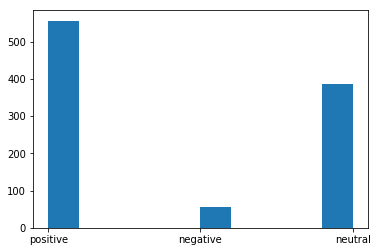

In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt
def polarity():
    pole=[]
    t=[]
    for line in df["text"]:
        temp=TextBlob(line).sentiment.polarity
        t.append(temp)
        if(temp>0):
            pole.append('positive')
        elif(temp<0):
            pole.append('negative')
        else:
            pole.append('neutral')
    return(pole,t)
pole,temp=polarity()
df['Sentiment']=pole
df['Sentiment_score']=temp
plt.hist(pole,histtype='bar',align='mid')
df['Sentiment']=pd.Categorical(df['Sentiment']).codes
df['Sentiment']=pd.Categorical(df['Sentiment']).rename_categories([-1,0,1])